<a href="https://www.kaggle.com/code/surajbansi28/diabetes-detection-through-retinopathy?scriptVersionId=226524863" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets
from typing import List, Tuple, Dict
from PIL import Image
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
# Set device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
train_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train"
test_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"
val_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val"

data_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

# Create ImageFolders for train, val and test datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform, # transform for the data
                                  target_transform=None) # transform for the label/target
val_data = datasets.ImageFolder(root=val_dir,
                                transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

train_data.classes, test_data.classes, val_data.classes

In [ ]:
from torch.utils.data import DataLoader

# Define batch size
batch_size = 32  

# Create data loaders
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)


In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load a pre-trained ResNet model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet50(pretrained=True)

# Modify the final layer to match our number of classes (5 for DR severity levels)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 output classes (No_DR, Mild, Moderate, Severe, Proliferative_DR)

# Move the model to GPU (if available)
model = model.to(device)


In [ ]:
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)


In [ ]:
#Training the Model.
num_epochs = 10  # Adjust based on performance

for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")


In [ ]:
model.eval()  # Set model to evaluation mode
correct, total = 0, 0

with torch.no_grad():  # No gradient updates in validation
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
        _, predicted = torch.max(outputs, 1)  # Get highest probability class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")


In [ ]:
# Save model
torch.save(model.state_dict(), "diabetic_retinopathy_model.pth")
print("Model saved successfully!")


In [4]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets
from PIL import Image
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.cuda.empty_cache()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Download dataset
kushagratandon12_diabetic_retinopathy_balanced_path = kagglehub.dataset_download('kushagratandon12/diabetic-retinopathy-balanced')

train_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train"
test_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"
val_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val"

# Data transformation
data_transform = transforms.Compose([
    transforms.Resize(size=(299, 299)),  # Adjusted for InceptionV3
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

# Load datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
val_data = datasets.ImageFolder(root=val_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)




KeyboardInterrupt: 

Epoch 1, Loss: 0.9687517478185541
Epoch 2, Loss: 0.7467985416981665
Epoch 3, Loss: 0.6046314702150138
Epoch 4, Loss: 0.5117159968187266
Epoch 5, Loss: 0.4382586518768221
Epoch 6, Loss: 0.37056983901899965
Epoch 7, Loss: 0.3161741023855832
Epoch 8, Loss: 0.2693511610782212
Epoch 9, Loss: 0.22992058602839655
Epoch 10, Loss: 0.19950950499418574
Model saved to inceptionv3_diabetic_retinopathy.pt
Validation Accuracy: 82.17%


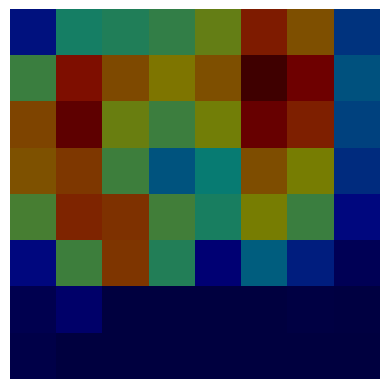

In [4]:
# Load InceptionV3 model
model = models.inception_v3(pretrained=True, aux_logits=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 classes
model = model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader)}")

# Save the trained model
model_path = "inceptionv3_diabetic_retinopathy.pt"
torch.save(model.state_dict(), model_path)
print(f"Model saved to {model_path}")

# Validation
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Validation Accuracy: {accuracy:.2f}%")

# Grad-CAM Implementation
def get_grad_cam(model, image, target_layer):
    model.eval()
    gradients = []
    activations = []
    
    def save_gradient(grad):
        gradients.append(grad)
    
    def forward_hook(module, input, output):
        activations.append(output)
        output.register_hook(save_gradient)
    
    target_layer.register_forward_hook(forward_hook)
    
    image = image.unsqueeze(0).to(device)
    output = model(image)
    class_idx = output.argmax(dim=1).item()
    score = output[:, class_idx].squeeze()
    
    model.zero_grad()
    score.backward()
    
    gradient = gradients[0].cpu().data.numpy()[0]
    activation = activations[0].cpu().data.numpy()[0]
    
    weights = np.mean(gradient, axis=(1, 2))
    cam = np.sum(weights[:, np.newaxis, np.newaxis] * activation, axis=0)
    cam = np.maximum(cam, 0)
    cam = (cam - np.min(cam)) / (np.max(cam) - np.min(cam))
    
    return cam

# Example usage with test image
sample_image, _ = test_data[0]
target_layer = model.Mixed_7c
cam = get_grad_cam(model, sample_image, target_layer)

plt.imshow(sample_image.permute(1, 2, 0))
plt.imshow(cam, cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

In [1]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.models as models
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms, datasets
from PIL import Image
from tqdm.auto import tqdm
from timeit import default_timer as timer

torch.cuda.empty_cache()
torch.manual_seed(42)
torch.cuda.manual_seed(42)

device = "cuda" if torch.cuda.is_available() else "cpu"

# Download dataset
kushagratandon12_diabetic_retinopathy_balanced_path = kagglehub.dataset_download('kushagratandon12/diabetic-retinopathy-balanced')

train_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/train"
test_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/test"
val_dir = "/kaggle/input/diabetic-retinopathy-balanced/content/Diabetic_Balanced_Data/val"

# Data transformation
data_transform = transforms.Compose([
    transforms.Resize(size=(299, 299)),  # Adjusted for InceptionV3
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.RandomRotation(15),
    transforms.ToTensor()
])

# Load datasets
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform)
val_data = datasets.ImageFolder(root=val_dir, transform=data_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

batch_size = 32
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

In [8]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import numpy as np

# Load InceptionV3 model with pretrained weights
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the model with aux_logits=True first
weights = models.Inception_V3_Weights.DEFAULT  # Get pretrained weights
model = models.inception_v3(weights=weights, aux_logits=True)  # Must keep aux_logits=True to load weights

# Disable aux_logits by removing the auxiliary classifier
model.aux_logits = False  # Set to False
model.AuxLogits = None  # Remove auxiliary classifier

# Replace the final fully connected (fc) layer
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 5)  # 5 output classes

model = model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-4)

# Early stopping parameters
patience = 5  # Stop if validation loss does not improve for 5 epochs
best_val_loss = np.inf
counter = 0

num_epochs = 50  # Increase as needed

# Training loop with Early Stopping
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(images)  # No .logits needed
        loss = criterion(outputs, labels)  
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    
    # Validation Phase
    model.eval()
    val_loss = 0.0
    correct, total = 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # No .logits needed
            loss = criterion(outputs, labels)  
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)  # No .logits needed
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Accuracy: {val_accuracy:.2f}%")

    # Early Stopping Check
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
        torch.save(model.state_dict(), "model_best.pt")  # Save the best model
        print("✅ Model improved. Saved as model_best.pt")
    else:
        counter += 1
        print(f"⏳ No improvement for {counter} epochs...")

        if counter >= patience:
            print("⛔ Early stopping triggered! Training stopped.")
            break  # Stop training if no improvement

print("Training completed!")


Epoch 1 | Train Loss: 0.9684 | Val Loss: 0.7697 | Val Accuracy: 68.29%
✅ Model improved. Saved as model_best.pt
Epoch 2 | Train Loss: 0.7415 | Val Loss: 0.6744 | Val Accuracy: 70.99%
✅ Model improved. Saved as model_best.pt
Epoch 3 | Train Loss: 0.6076 | Val Loss: 0.5807 | Val Accuracy: 75.15%
✅ Model improved. Saved as model_best.pt
Epoch 4 | Train Loss: 0.5130 | Val Loss: 0.5369 | Val Accuracy: 76.48%
✅ Model improved. Saved as model_best.pt
Epoch 5 | Train Loss: 0.4362 | Val Loss: 0.5153 | Val Accuracy: 78.06%
✅ Model improved. Saved as model_best.pt
Epoch 6 | Train Loss: 0.3738 | Val Loss: 0.5232 | Val Accuracy: 78.83%
⏳ No improvement for 1 epochs...
Epoch 7 | Train Loss: 0.3111 | Val Loss: 0.5031 | Val Accuracy: 80.21%
✅ Model improved. Saved as model_best.pt
Epoch 8 | Train Loss: 0.2723 | Val Loss: 0.4907 | Val Accuracy: 81.26%
✅ Model improved. Saved as model_best.pt
Epoch 9 | Train Loss: 0.2305 | Val Loss: 0.4835 | Val Accuracy: 82.42%
✅ Model improved. Saved as model_best.pt


In [10]:
import shutil
shutil.make_archive('/kaggle/working/model', 'zip', '/kaggle/working', 'model_best.pt')


'/kaggle/working/model.zip'

In [21]:
from IPython.display import FileLink

# Create a downloadable link
FileLink("/kaggle/working/model.zip")


/kaggle/working/model.zip

In [22]:
!mv /kaggle/working/model.zip /kaggle/outputs/


mv: cannot create regular file '/kaggle/outputs/': Not a directory
